In [1]:
import pandas as pd

df=pd.read_csv('Mall_Customers.csv')

In [2]:
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore' }, inplace=True )

In [7]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


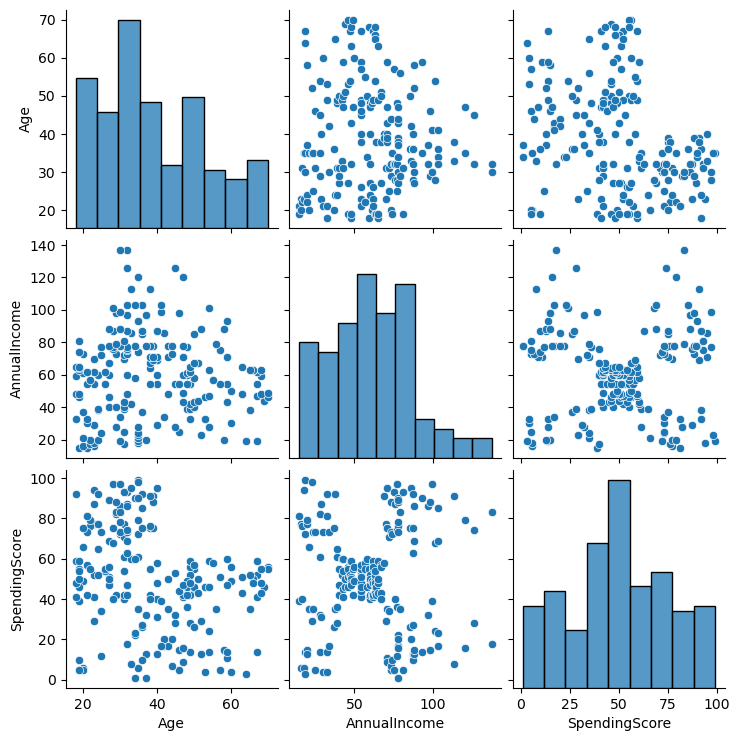

In [9]:
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore' ]])

plt.show()

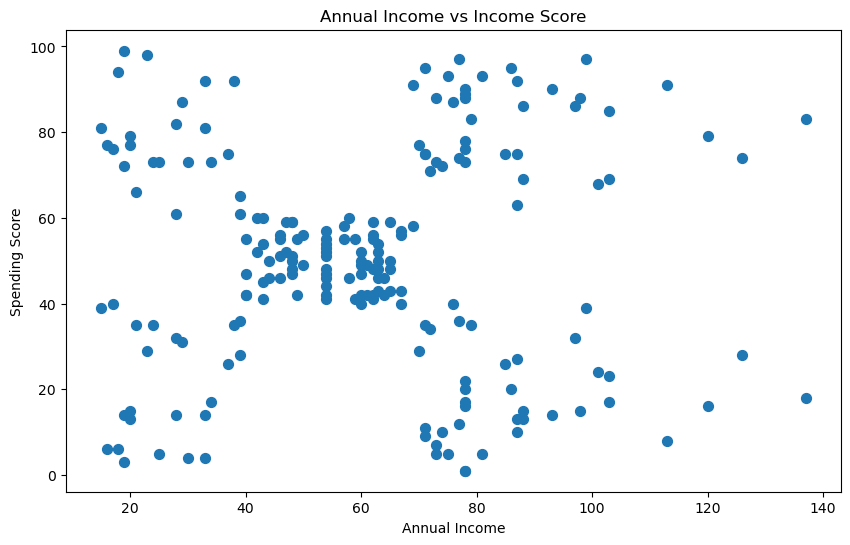

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df['AnnualIncome'],df['SpendingScore'], s=50)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Income Score')

plt.show()

In [11]:
from sklearn.cluster import KMeans

X = df[['AnnualIncome','SpendingScore']]

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\ashish.sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


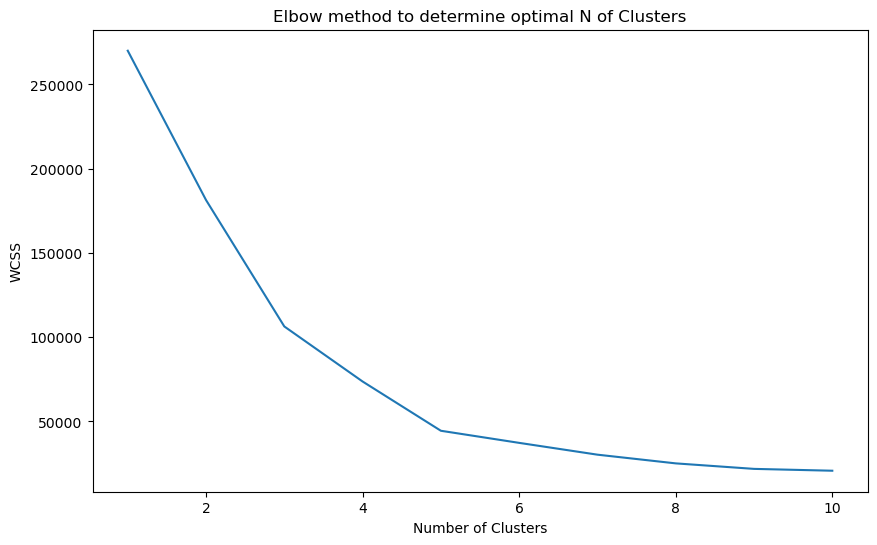

In [12]:
plt.figure(figsize=(10,6))

plt.plot(range(1,11),wcss)

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of Clusters')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter=300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(X)

In [14]:
df['Cluster']=y_kmeans

In [15]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


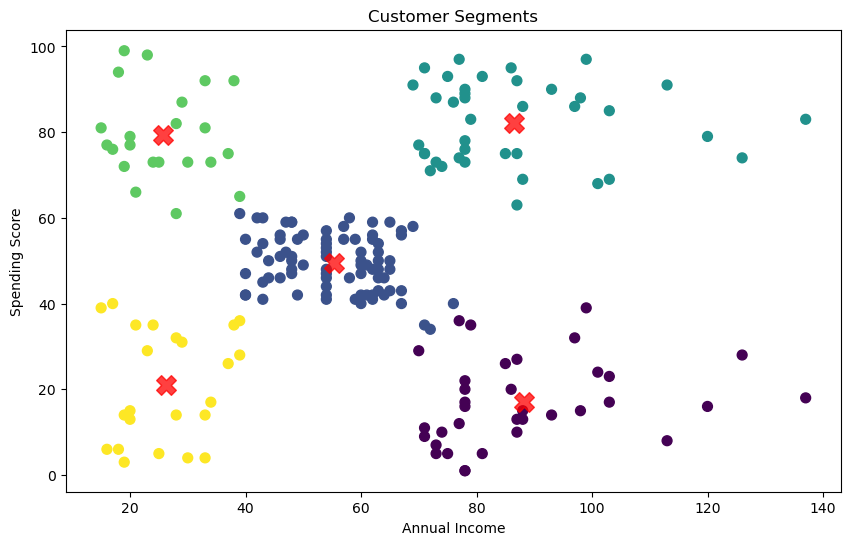

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')

centers=kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

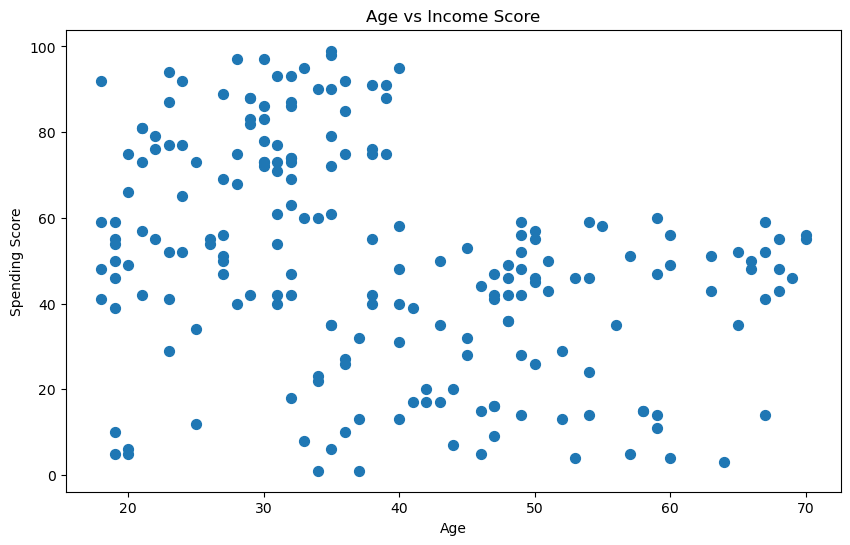

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(df['Age'],df['SpendingScore'], s=50)

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Income Score')

plt.show()

In [18]:
from sklearn.cluster import KMeans

X = df[['Age','SpendingScore']]

wcss1 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss1.append(kmeans.inertia_)

C:\Users\ashish.sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


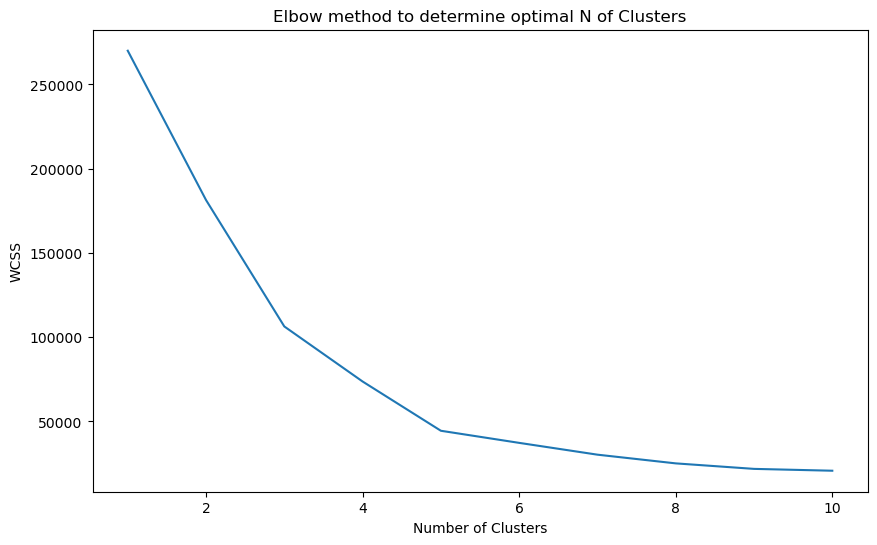

In [19]:
plt.figure(figsize=(10,6))

plt.plot(range(1,11),wcss)

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of Clusters')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter=300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(X)

df['ClusterAge']=y_kmeans

In [22]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,4,2


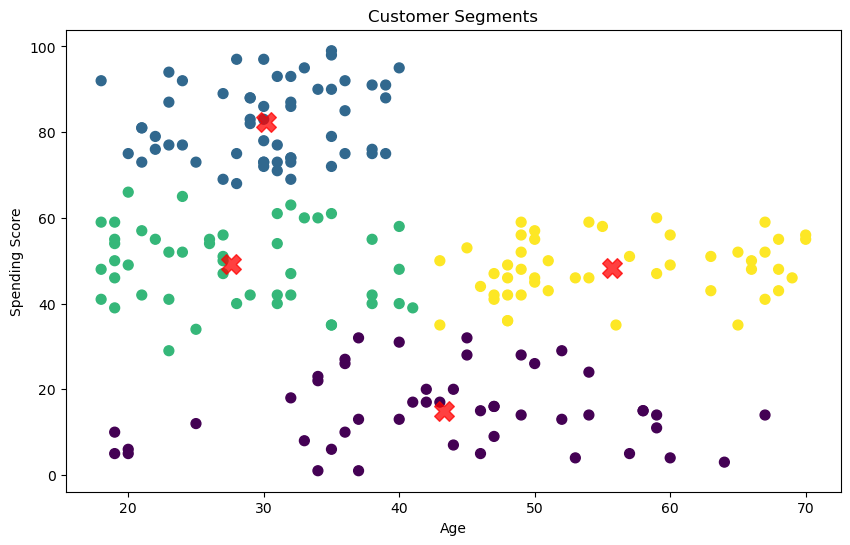

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')

centers=kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()